# Magic square 

Find magic squares of a given size $n$. The sum in each row and column has to be equal as well as the diagonals. It is best explained by this picture from Wikipedia (here $n=3$):

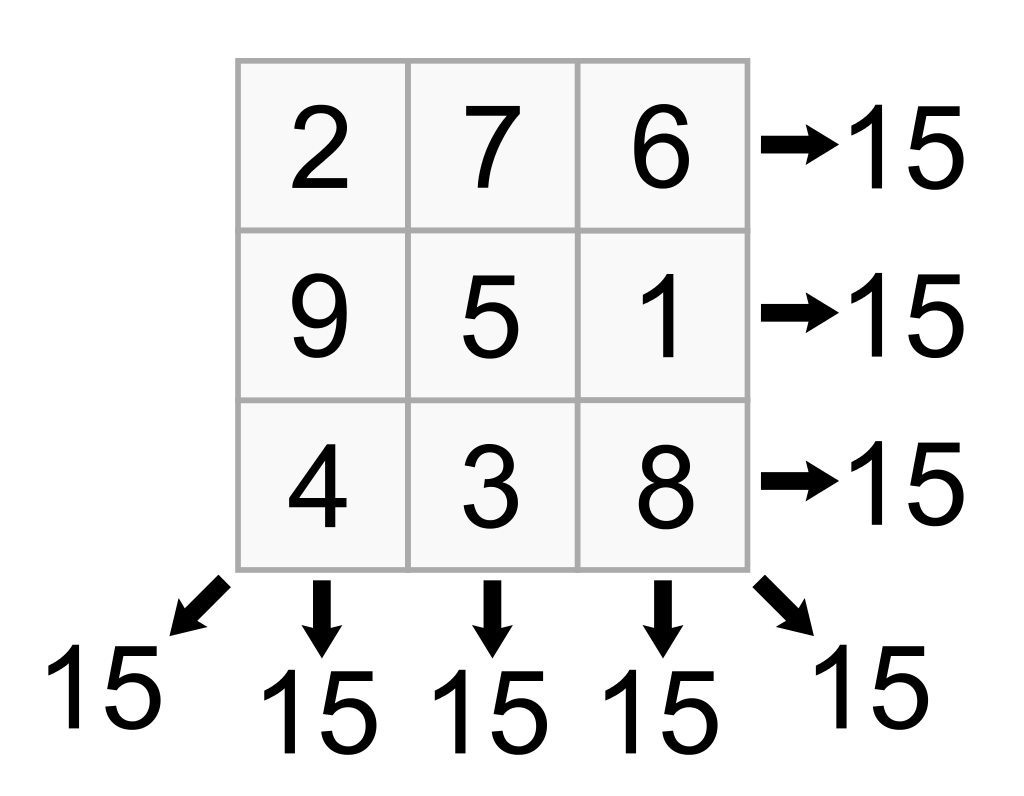

In [1]:
from IPython.display import Image, display
display(Image("./instances/Magicsquareexample.png", width=500))

In [2]:
%%file ./instances/magicsquare.lp
% default size n=3
#const n=3.
#const result=(n+n**3)/2.

{number(X,Y,N) : N=1..n*n} = 1 :- X=1..n, Y=1..n.

% each number 1..n**2 is observed
:- not number(_,_,N), N=1..n*n.

% each row/column sum up to (n+n**3)/2
:- #sum{N: number(X,_,N)} != result, X=1..n.
:- #sum{N: number(_,Y,N)} != result, Y=1..n.

% diagonals
:- #sum{N: number(X,X,N), X=1..n} != result.
:- #sum{N: number(X,n-X+1,N), X=1..n} != result.

Overwriting ./instances/magicsquare.lp


Find some solutions

In [3]:
!clingo ./instances/magicsquare.lp 3

clingo version 5.6.2
Reading from ./instances/magicsquare.lp
Solving...
Answer: 1
number(1,1,2) number(2,1,9) number(3,1,4) number(1,2,7) number(2,2,5) number(3,2,3) number(1,3,6) number(2,3,1) number(3,3,8)
Answer: 2
number(1,1,8) number(2,1,1) number(3,1,6) number(1,2,3) number(2,2,5) number(3,2,7) number(1,3,4) number(2,3,9) number(3,3,2)
Answer: 3
number(1,1,4) number(2,1,9) number(3,1,2) number(1,2,3) number(2,2,5) number(3,2,7) number(1,3,8) number(2,3,1) number(3,3,6)
SATISFIABLE

Models       : 3+
Calls        : 1
Time         : 0.003s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)
CPU Time     : 0.003s


Check if it really is a magic square:

In [4]:
import subprocess
import json
result = subprocess.run(["clingo", "./instances/magicsquare.lp", "0", "--outf=2"], stdout=subprocess.PIPE)
solutions = json.loads(result.stdout)["Call"][0]["Witnesses"]

Parsing the solutions

In [5]:
import re
pattern = re.compile(r"number\((\d+),(\d+),(\d+)\)")

parsed = []
for s in solutions:
    number_list = s["Value"]
    d = {}
    for elem in number_list:
        numbers = re.search(pattern, elem)
        x,y,n = numbers.group(1), numbers.group(2), numbers.group(3)
        d[x+y] = n
    parsed.append(d)

parsed[0] # first solution

{'11': '2',
 '21': '9',
 '31': '4',
 '12': '7',
 '22': '5',
 '32': '3',
 '13': '6',
 '23': '1',
 '33': '8'}

There are that many solutions:

In [6]:
len(parsed)

8

Check each solution:

In [7]:
import math
n = int(math.sqrt(len(parsed[0])))
magic_number = (n+n**3)/2

# row
for sol in parsed:
    for x in range(1,n+1):
        res = 0
        for y in range(1,n+1):
            res += int(sol[str(x)+str(y)])

        assert res == magic_number

# col
for sol in parsed:
    for y in range(1,n+1):
        res = 0
        for x in range(1,n+1):
            res += int(sol[str(x)+str(y)])

        assert res == magic_number

# diagonals
for sol in parsed:
    res_diag = res_antidiag = 0
    for x in range(1,n+1):
        res_diag += int(sol[str(x)+str(x)])
        res_antidiag += int(sol[str(x)+str(n+1-x)])

    assert res_diag == magic_number
    assert res_antidiag == magic_number
